# Chapter III - The Internet Network

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import networkx as nx
from bs4 import BeautifulSoup

the name of the module changed

## Network from SVG with the best node positioning

In [4]:
def Graph_from_SVG(stream):

    G=nx.Graph()
    
    attrs = {
        "line" :  ["x1","y1","x2","y2"]
    }
    
    op = open(stream,"r")
    xml = op.read()
    
    soup = BeautifulSoup(xml)
    
    count=0
    # attribute counter
    node_diz={}
    # list of the nodes. It's a dictionary
    pos={}
    # list of the node positions. It's a dictionary
    for attr in attrs.keys():
        tmps = soup.findAll(attr)
        for t in tmps:
            node1=(t['x1'],t['y1'])
            node2=(t['x2'],t['y2'])
            if not node_diz.has_key(node1):
                node_diz[node1]=str(count)
                pos[str(count)]=(float(node1[0]),float(node1[1]))
                count+=1
            if not node_diz.has_key(node2):
                node_diz[node2]=str(count)
                pos[str(count)]=(float(node2[0]),float(node2[1]))
                count+=1
            G.add_edge(node_diz[node1],node_diz[node2])
    #save the graph in an edge list format
    nx.write_edgelist(G, "./data/test_graph.dat",data=False)
    
    return G,pos

## Plotting the test Networks

In [ ]:
#getting the network in the SVG format 
file="./data/test_graph.svg"
(G,pos)=Graph_from_SVG(file)

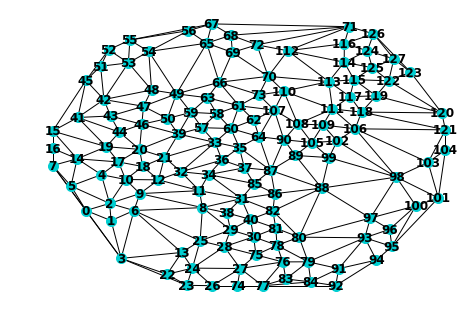

In [11]:
#plot the optimal node distribution
nx.draw(G, pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
#save the graph on a figure file
savefig("./data/test_network_best.png", dpi=200)

#plotting the basic network
G=nx.read_edgelist("./data/test_graph.dat")
graphviz_pos=nx.nx_agraph.graphviz_layout(G)
nx.draw(G, graphviz_pos, node_size = 150, node_color='black')
#save the graph on a figure file
savefig("./data/test_network_graphviz.png", dpi=200)


## Degree Centrality

In [14]:
degree_centrality=nx.degree(G)
print degree_centrality

[(u'41', 6), (u'24', 7), (u'25', 6), (u'26', 4), (u'27', 7), (u'20', 7), (u'21', 6), (u'22', 4), (u'23', 4), (u'28', 6), (u'29', 6), (u'0', 5), (u'4', 5), (u'8', 7), (u'120', 5), (u'121', 5), (u'122', 6), (u'123', 4), (u'124', 5), (u'125', 5), (u'126', 5), (u'127', 5), (u'59', 6), (u'58', 5), (u'55', 5), (u'54', 6), (u'57', 5), (u'56', 4), (u'51', 4), (u'50', 5), (u'53', 6), (u'52', 4), (u'115', 6), (u'114', 6), (u'117', 5), (u'116', 5), (u'111', 7), (u'110', 6), (u'113', 7), (u'112', 6), (u'82', 6), (u'83', 4), (u'80', 7), (u'81', 5), (u'119', 5), (u'118', 6), (u'84', 5), (u'85', 5), (u'3', 7), (u'7', 5), (u'108', 6), (u'109', 5), (u'102', 5), (u'103', 5), (u'100', 5), (u'101', 5), (u'106', 7), (u'107', 7), (u'104', 3), (u'105', 6), (u'39', 7), (u'38', 4), (u'33', 7), (u'32', 6), (u'31', 8), (u'30', 6), (u'37', 5), (u'36', 5), (u'35', 6), (u'34', 6), (u'86', 5), (u'60', 7), (u'61', 7), (u'62', 4), (u'63', 5), (u'64', 6), (u'65', 7), (u'66', 7), (u'67', 5), (u'68', 5), (u'69', 5), (u'2

In [23]:
list(degree_centrality)[0]

(u'41', 6)

In [31]:
l=[]
res=dict(degree_centrality)
# in the last version of Networkx nx.degree(G) in no more a dictionary
for n in G.nodes():
    #if n not in res:
    # in python3 the .has_key was remove
    if not res.has_key(n):
        
        print 'stocazzo'
        res[n]=0.0
    l.append(res[n])

#type(degree_centrality)

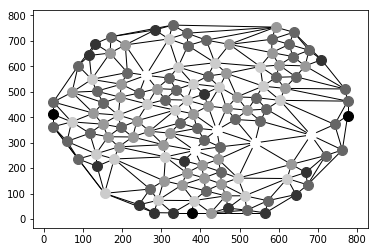

In [28]:
nx.draw_networkx_edges(G, pos)

for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/float((max(l)-min(l))) ) 
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color =
    color)

savefig("./data/degree_200.png",dpi=200)

In [34]:
from matplotlib import cm

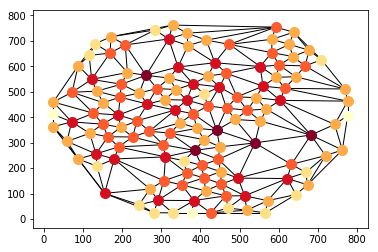

In [51]:
nx.draw_networkx_edges(G, pos)


for n in G.nodes():
    list_nodes=[n]
    color = (res[n]-min(l))/float((max(l)-min(l)))
    rgb = cm.get_cmap('YlOrRd')(color)
    #print rgb
    
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color =rgb)

savefig("./data/degree_200_colours.png",dpi=200)

## Define a function that calculate the distance from a root node

It lists the distances of all nodes respect from a root

In [53]:
def node_distance(G,root_node):
    queue=[]
    list_distances=[]
    queue.append(root_node)
    #deleting the old keys
    if G.node[root_node].has_key('distance'):
        for n in G.nodes():
            del G.node[n]['distance']
    G.node[root_node]["distance"]=0
    while len(queue):
        working_node=queue.pop(0)
        for n in G.neighbors(working_node):
            if len(G.node[n])==0:
                G.node[n]["distance"]=G.node[working_node] \
                ["distance"]+1
                queue.append(n)
    for n in G.nodes():
        list_distances.append(((root_node,n),G.node[n]["distance"]))
    return list_distances

## Closeness Centrality

In [61]:
node_distance(G,'0')[0][1]

4

$\langle d_i\rangle=\dfrac{\sum_{j\in V/\{i\}} d_{ij}}{N-1}=\sum_{j\in V/\{i\}} \dfrac{d_{ij}}{N-1}$

In [54]:
norm=0.0
diz_c={}
l_values=[]
for n in G.nodes():
    l=node_distance(G,n)
    ave_length=0
    for path in l:
        ave_length+=float(path[1])/(G.number_of_nodes()-1-0)
    norm+=1/ave_length
    diz_c[n]=1/ave_length
    l_values.append(diz_c[n])

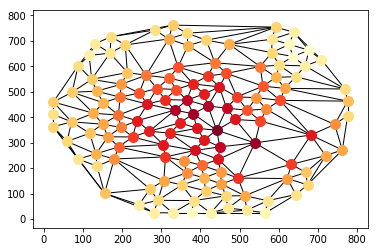

In [75]:
#visualization
nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = (diz_c[n]-min(l_values))/(max(l_values)- \
                                          min(l_values))
    rgb = cm.get_cmap('YlOrRd')(color)
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = \
                           100, node_color = rgb)
    
savefig("./data/closeness_200_colours.png",dpi=200)

## Betweenness Centrality

In [74]:
list_of_nodes=list(G.nodes())
# the output data type changed in the last version of NetworkX
num_of_nodes=G.number_of_nodes()
bc={} #we will need this dictionary later on
for i in range(num_of_nodes-1):
    for j in range(i+1,num_of_nodes):
        paths=nx.all_shortest_paths(G,source=list_of_nodes[i], \
                                    target=list_of_nodes[j])
        # consider each couple of nodes and all shortest path connecting them
        count=0.0
        path_diz={}
        for p in paths:
            #print p
            count+=1.0
            # for each path, add 1 for each node visited
            for n in p[1:-1]:
                if not path_diz.has_key(n):
                    path_diz[n]=0.0
                path_diz[n]+=1.0
        for n in path_diz.keys():
            path_diz[n]=path_diz[n]/count
            # normalise the contribution by the number of shortest paths
            if not bc.has_key(n):
                bc[n]=0.0
            bc[n]+=path_diz[n]  

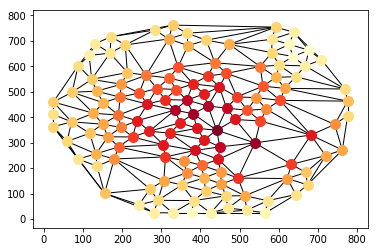

In [77]:
#visualization
l=[]
res=bc
for n in G.nodes():
    if not res.has_key(n):
        res[n]=0.0
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = (diz_c[n]-min(l_values))/(max(l_values)- \
                                          min(l_values))
    rgb = cm.get_cmap('YlOrRd')(color)
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = \
                           100, node_color = rgb)

savefig("./data/betweenness_200_colours.png",dpi=200)

## Eigenvector Centrality

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


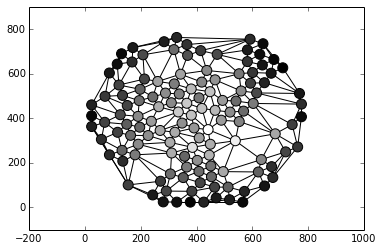

In [11]:
#networkx eigenvector centrality
centrality=nx.eigenvector_centrality_numpy(G)

#visualization
l=[]
res=centrality
for n in G.nodes():
    if not res.has_key(n):
        res[n]=0.0
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/(max(l)-min(l)) ) 
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color = color)

savefig("eigenvetor_200.png",dpi=200)


## Computing the Giant Connected Component

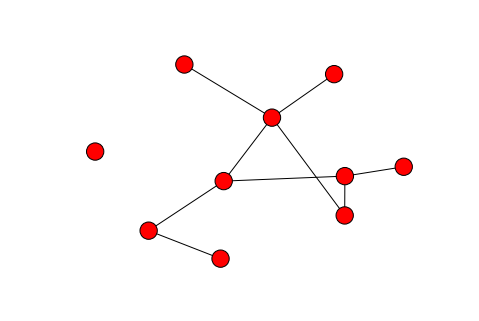

In [12]:
#Generating the test graph with two components

G_test=nx.Graph()
G_test.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),
                       ('D','F'), ('D','H'),('D','G'),('E','G'),
                       ('E','I')])
#disconnetted node
G_test.add_node('X')
nx.draw(G_test)

savefig("components_200.png",dpi=200)

### Giant Component through a Breadth First Search

In [13]:
def giant_component_size(G_input):
    
    G=G_input.copy()
    
    components=[]

    node_list=G.nodes()

    while len(node_list)!=0:
        root_node=node_list[0]
        component_list=[]
        component_list.append(root_node)
        queue=[]
        queue.append(root_node)
        G.node[root_node]["visited"]=True
        while len(queue):
            working_node=queue.pop(0)
            for n in G.neighbors(working_node):
                #check if any node attribute exists
                if len(G.node[n])==0:
                    G.node[n]["visited"]=True
                    queue.append(n)
                    component_list.append(n)
        components.append((len(component_list),component_list))
        #remove the nodes of the component just discovered
        for i in component_list: node_list.remove(i)
    components.sort(reverse=True)

    GiantComponent=components[0][1]
    SizeGiantComponent=components[0][0]
    
    return GiantComponent,len(components)

(GCC, num_components)=giant_component_size(G_test)
print "Giant Connected Component:",GCC
print "Number of components:",num_components

Giant Connected Component: ['A', 'C', 'B', 'E', 'D', 'I', 'G', 'H', 'F']
Number of components: 2


## Robustness

### Breaking the GCC

In [14]:
import copy

def breaking_graph(H,node_list):
    #define the new graph as the subgraph induced by the GCC
    n_l=copy.deepcopy(node_list)
    #iterate deleting from the GCC while the graph comprises 
    #one component (num_components=1)
    num_components=1
    count=0
    while num_components==1:
        count+=1
        #node_to_delete=random.choice(H.nodes()) #select at random an element in the node list
        #select a node according to the betweenness ranking 
        #(the last in the list)
        node_to_delete=n_l.pop() 
        H.remove_node(node_to_delete)
        #(GCC,num_components)=giant_component_size(H)
        num_components=nx.number_connected_components(H)
    return count

### Breaking the graph randomly

num of iterations: 3


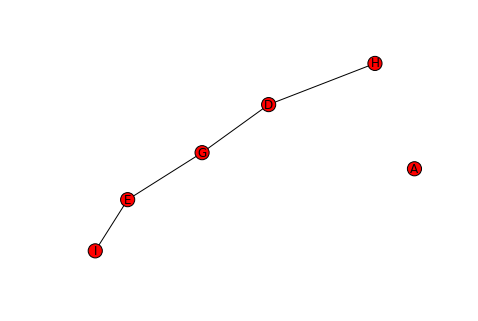

In [15]:
(GCC, num_components)=giant_component_size(G_test)

G_GCC = G_test.subgraph(GCC)

random_list=copy.deepcopy(G_GCC.nodes())
random.shuffle(random_list)

c=breaking_graph(G_GCC,random_list)

print "num of iterations:", c

graphviz_pos=nx.graphviz_layout(G_GCC)

nx.draw(G_GCC, graphviz_pos, node_size = 200, with_labels=True)

savefig("./data/broken_component_200.png",dpi=200)

## Averaging the random result

In [18]:
#loading the Automous System (AS) graph
G_AS=nx.read_edgelist("./data/AS-19971108.dat")
print "number of nodes:",G_AS.number_of_nodes(), \
"number of edges:",G_AS.number_of_edges()

(GCC, num_components)=giant_component_size(G_AS)

n_iter=1000
count=0.0
for i in range(n_iter):
    G_GCC = G_AS.subgraph(GCC)
    random_list=copy.deepcopy(G_GCC.nodes())
    random.shuffle(random_list)
    c=breaking_graph(G_GCC,random_list)
    count+=c

print "average iterations to break GCC:",count/n_iter

number of nodes: 3015 number of edges: 5156
average iterations to break GCC: 8.418


## Breaking with Betweenness Centrality

In [19]:
import operator

G_GCC = G_AS.subgraph(GCC)

node_centrality=nx.betweenness_centrality(G_GCC, k=None, \
normalized=True, weight=None, endpoints=False, seed=None)
#node_centrality=nx.degree_centrality(G)

sorted_bc = sorted(node_centrality.items(), \
key=operator.itemgetter(1))

#selecting the ranked node list
node_ranking=[]
for e in sorted_bc:
    node_ranking.append(e[0])

c=breaking_graph(G_GCC,node_ranking)

print "num of iterations:", c

num of iterations: 1
